In [153]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [154]:
data=pd.read_csv('ramanset.csv')

In [155]:
feature_col=['Type']
for i in xrange(3600,199,-1):
    feature_col.append(str(i));

In [156]:
y=data['weight']
y.head()

0    5.286487
1    5.252417
2    5.494624
3    5.496264
4    5.729499
Name: weight, dtype: float64

In [157]:
X=data[feature_col]
X.head()

,Type,3600,3599,3598,3597,3596,3595,3594,3593,3592,...,209,208,207,206,205,204,203,202,201,200
0,1,0.37648,0.34072,0.31380,0.30117,0.30560,0.32572,0.35712,0.39188,0.42335,...,59.603298,59.479729,59.361912,59.216850,59.018200,58.732979,58.320450,57.722679,56.868259,55.697010
1,1,0.46181,0.46536,0.46727,0.46541,0.45869,0.44758,0.43413,0.42185,0.41460,...,62.156342,62.022228,61.890862,61.727539,61.506962,61.193272,60.738701,60.072491,59.107941,57.775730
2,1,0.31230,0.31096,0.32811,0.36561,0.42090,0.48596,0.54929,0.59700,0.61931,...,61.037392,60.868259,60.701649,60.503288,60.251518,59.918880,59.468910,58.841530,57.956501,56.742352
3,1,0.80430,0.82030,0.83026,0.83234,0.82650,0.81450,0.79965,0.78530,0.77486,...,60.487961,60.387821,60.283081,60.131451,59.901779,59.558048,59.059399,58.348389,57.355640,56.028000
4,1,0.59895,0.60989,0.61788,0.62057,0.61810,0.61321,0.60997,0.61180,0.62084,...,61.957829,61.879768,61.802261,61.686989,61.507820,61.233830,60.826511,60.226360,59.355900,58.148998


In [158]:
X.as_matrix()
#X.shape

array([[  1.        ,   0.37648001,   0.34072   , ...,  57.72267914,
         56.86825943,  55.69701004],
       [  1.        ,   0.46180999,   0.46535999, ...,  60.07249069,
         59.10794067,  57.77573013],
       [  1.        ,   0.3123    ,   0.31095999, ...,  58.84152985,
         57.95650101,  56.74235153],
       ..., 
       [  4.        ,   1.37319005,   1.40181994, ...,  44.38428116,
         43.5832901 ,  42.49391174],
       [  4.        ,   1.37188005,   1.35969996, ...,  48.19480896,
         47.32255173,  46.12488174],
       [  4.        ,   1.30224001,   1.31962001, ...,  47.84791183,
         46.9129982 ,  45.66690063]])

In [159]:
pca = PCA(copy=True,n_components=30)
pca.fit(X)
X = pca.transform(X)

In [160]:
X.shape

(120, 30)

In [161]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     random_start=100)
gp.fit(X_train, y_train)

GaussianProcess(beta0=None, corr=<function squared_exponential at 0x34c4cf8>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=100,
        random_state=<mtrand.RandomState object at 0x297e090>,
        regr=<function constant at 0x34c4938>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=array([[ 0.001]]),
        thetaU=array([[1]]), verbose=False)

In [162]:
y_pred, MSE = gp.predict(X_test, eval_MSE=True)
sigma = np.sqrt(MSE)

In [163]:
from sklearn import metrics
MAD= metrics.mean_squared_error(y_test,y_pred)
print MAD

0.640041654382


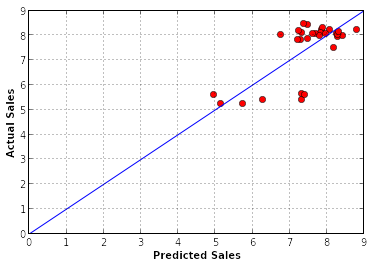

In [164]:
fig = plt.figure()
axes=fig.add_subplot(111)
a=np.arange(10)
axes.plot(y_pred, y_test, color='red',linestyle='',marker='o')
axes.plot(a,a, color='b',linestyle='-')
axes.set_xlabel('Predicted Sales',fontweight='bold')
axes.set_ylabel('Actual Sales',fontweight='bold')
axes.grid()

fig.savefig('tablet_pca.png')
plt.show()